In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Simulación numérica EDO jamiton

En el siguiente jupyter se simulará numéricamente la ecuación diferencial asociada a un jamiton. La EDO en cuestión corresponde a la siguiente expresión:

$$
v'(\chi) = \dfrac{w(v(\chi))}{r'(v(\chi))}
$$
donde $w(v) = \hat{U}(v) - mv + s$ y $r(v) = m\hat{h}(v) + m^2v$. Las funciones $U$ y $h$ vendrán dadas de manera explícita en el código. Las constantes se definirán de la misma manera.

In [3]:
# Parametros del modelo
rho_max = 1/7.5
u_max = 20

c = 0.078 * rho_max * u_max
b = 1/3
l = 1/10

tau = 3

# Funciones del modelo
def h(rho, rho_max=rho_max):
    sqrt = np.sqrt(rho/(rho_max - rho))
    return 8 * sqrt

def h_prime(rho, rho_max=rho_max):
    num = 4 * rho_max
    den = np.sqrt(rho) * np.sqrt((rho_max - rho))**3
    return num / den * (-1/rho**2)

def Q(rho, c=c, b=b, l=l, rho_max=rho_max):
    
    g = lambda y: np.sqrt(1 + ((y - b)/l)**2)
    
    output = c * (g(0) + (g(1) - g(0))*(rho/rho_max) - g(rho/rho_max))
    return output

def Q_barra(rho_barra, c=c, b=b, l=l, rho_max=rho_max):
    
    g = lambda y: np.sqrt(1 + ((y - b)/l)**2)
    
    output = c * (g(0) + (g(1) - g(0))*rho_barra - g(rho_barra))
    return output

def U(rho):
    return Q(rho)/rho

def U_gorro(v):
    return U(1/v)

def h_gorro(v):
    return h(1/v)

def h_gorro_prime(v):
    return h_prime(1/v)

def w(v, m, s):
    return U_gorro(v) - (m*v + s)

def r(v, m):
    return m * h_gorro(v) + m**2 * v

def r_prime(v, m):
    return m * h_gorro_prime(v) + m**2

In [4]:
# EDO a resolver
def edo(v, chi, m, s):
    dv = w(v, m, s) / r_prime(v, m)
    return dv

## Funciones del modelo

<Figure size 432x288 with 0 Axes>

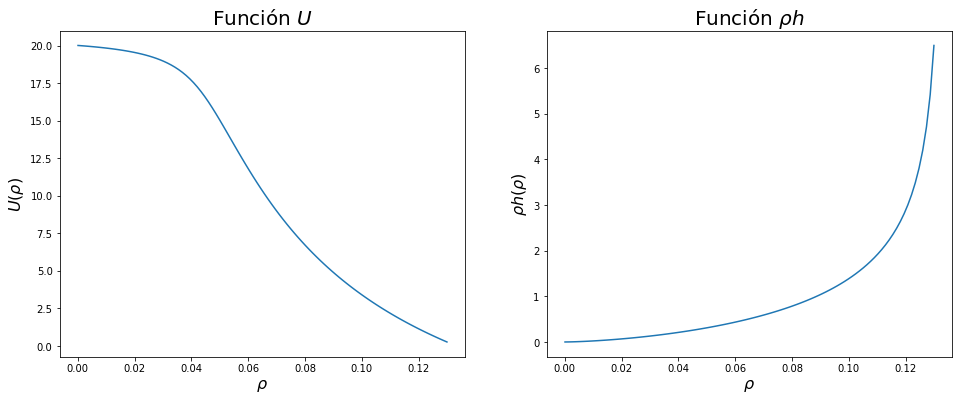

In [5]:
# Gráficos para U y rho*h
rho = np.linspace(0.0001, 0.13, 100)

plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(rho, U(rho))
ax[0].set_ylabel(r"$U(\rho)$", fontsize=16)
ax[0].set_xlabel(r"$\rho$", fontsize=16)
ax[0].set_title(r"Función $U$", fontsize=20)

ax[1].plot(rho, rho*h(rho))
ax[1].set_ylabel(r"$\rho h(\rho)$", fontsize=16)
ax[1].set_xlabel(r"$\rho$", fontsize=16)
ax[1].set_title(r"Función $\rho h$", fontsize=20)

#plt.savefig("Graficos/funciones_U_h")
plt.show()

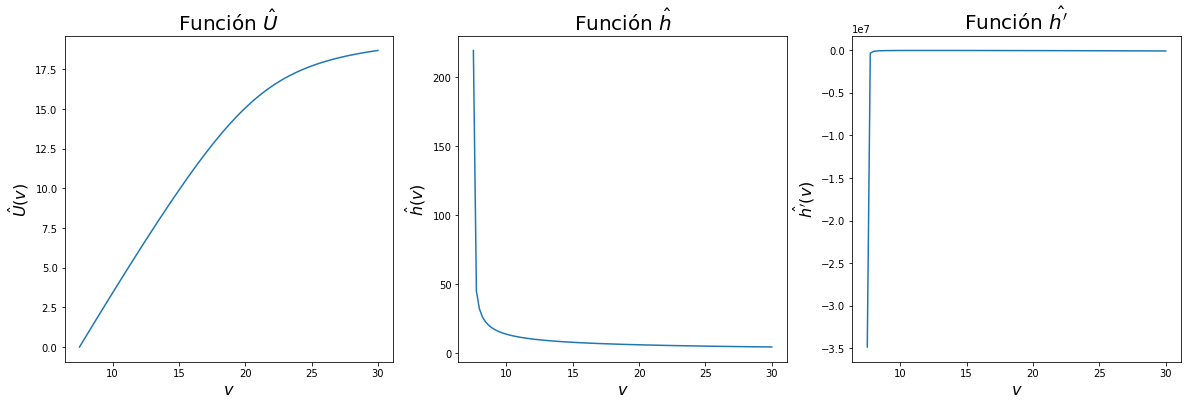

In [6]:
# Funciones U gorro ,h gorro y hprima gorro
v = np.linspace(7.51, 30, 100)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].plot(v, U_gorro(v))
ax[0].set_ylabel(r"$\hat{U}(v)$", fontsize=16)
ax[0].set_xlabel(r"$v$", fontsize=16)
ax[0].set_title(r"Función $\hat{U}$", fontsize=20)

ax[1].plot(v, h_gorro(v))
ax[1].set_ylabel(r"$\hat{h}(v)$", fontsize=16)
ax[1].set_xlabel(r"$v$", fontsize=16)
ax[1].set_title(r"Función $\hat{h}$", fontsize=20)

ax[2].plot(v, h_gorro_prime(v))
ax[2].set_ylabel(r"$\hat{h'}(v)$", fontsize=16)
ax[2].set_xlabel(r"$v$", fontsize=16)
ax[2].set_title(r"Función $\hat{h'}$", fontsize=20)

#plt.savefig("Graficos/funciones_U_h_gorro")
plt.show()